## Tutorial 7. Probability distributions


Created by Emanuel Flores-Bautista 2019.  All content contained in this notebook is licensed under a [Creative Commons License 4.0](https://creativecommons.org/licenses/by/4.0/). The code is licensed under a [MIT license](https://opensource.org/licenses/MIT). This notebook was based on the BeBi103 class from the amazing Justin Bois. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats as st

import matplotlib.pyplot as plt
import TCD19_utils as TCD

TCD.set_plotting_style_2()

#Magic command to enable plotting inside notebook
%matplotlib inline

#Magic command to enable svg format in plots
%config InlineBackend.figure_format = 'svg'

np.random.seed(20)

## A necessary rant on probability and statistics

### Why probability ?

Data science is inherently a statistical subject. When analyzing large amounts of data we need to know how randomness could affect our observations and how sure can we be about a certain conclusion given our data. 

One could also argue that an important subject to learn from would be linear algebra as it is the basis for most of the manipulations that are working under the hood in the machine learning models we will see in the next module. While this is true, this workshop is not focused solely on machine learning, but on data science as a whole. Therefore, I think that a proper refreshing on probability and statistics is necessary for a better understanding of the types of things we can do with data analysis. 

Probability can indeed be a very hard subject because of the inherent mathematical and conceptual complexity behind it. However, we will take a very practical approach and see how we can use the tools from probability and statistics to get a better sense of our data, through the abstraction into certain "summary statistics" and to develop an intuition to understand the models we'll use in the next module and to  create more complex mathematical models in the future.

It is because of this complexity that it was hard for me to even design this module as I'm trying to re-learn probability and statistics to delve into bayesian inference, information theory, statitstical physics and stochastic modeling of genetic circuits. 

### Distinction between bayesian and frequentist statistics. 

Probabilities take values between 0 and 1, where 0 means impossibility and 1 means certainty. However, there are two ways of thinking of probabilities.  

Frequentists : Think of how classical stats courses are taught. The frequentist conception of probability $P(A)$of an event A is 

represents a long-run frequency over a
large number of identical repetitions of an experiment.

\begin{align}
P(A) = \frac{ \text{number of outcomes that favour event A}}{\text{total number of outcomes}}
\end{align}


Bayesian: bayesian stats in the other hand, "guesses" a probability in terms of our confidence that a given event might happen, and updates that guess with the more data. 


Bayesian inference allows us to have an intuition like the following image: 

While bayesian inference is beyond the scope of this course, you can readily see that bayesian inference is the more "common" thing for us humans to think of probabilities. We tend to think of a certain event given the information we know. This beautiful visualization captions our way of thinking.

In [2]:
from IPython.display import Image

Image(url= "https://raw.githubusercontent.com/zonination/perceptions/master/joy1.png", 
      width=400, height=400)

After this rant we can now start talking about some important concepts in probability and the stories behind different distributions. Let's begin...

If you want to know more about the difference between frequentism and bayesianism read this great [blog post from Jake Van der Plas](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/).

### let's be non-binary/ stop using p-values

A P-value by definition is the probability of observing the test statistic being at least as extreme as what was measured if the null hypothesis is true. We'll see how to calculate p-values using simulations like hacker statisticians, we'll use our computers to simulate the adquisition of new samples given a small dataset to do so. 

Do not use p-values for a binary classification of statistical significance, believe me. *share papers on p-values  

## Key concepts

Random variable: a variable whose possible values are numerical of an experiment. There are two types of random variables.

* Discrete: takes integer values or `int`s such as 1, 2, 3 ...
* Continue: takes decimal values or `float`s such as 28763.23

* Probability mass function (PMF): describes the probability of a discrete variable obtaining value  $x$ . The variable  $x$  takes on discrete values, so the normalization condition is

\begin{align}
\sum_{x}{f(x)} = 1
\end{align}

* Probability density function (PDF): A probability density function (PDF), which we shall call  $f(x)$ , is defined such that the probability that a continuous variable  $x$  is  $a \le x \le b$  is

\begin{align}
\int_a^b f(x)\mathrm{d}x.
\end{align}


## We all need a moment

The moments from probability distributions are often used to calculate summary statistics. We'll only use the first two moments in this tutorial and we'll use their plug-in estimates. The first two moments are the mean and the variance.

\begin{align}
\text{sample mean} = \bar{X} = \frac{\sum_{i}^{n } \, X_{i} \,}{n}
\end{align}

\begin{align}
\text{sample variance} = \sigma^{2} = \frac{\sum_{i=1}^{N} (x_{i} - \mu)^2}{N}
\end{align}

## Sampling and randomness

## Probability distributions 

### Bernoulli trials

### Bernoulli distribution

* **Story.** A single trial with either a success (`k = True`) or
failure (`k=False`) is performed. Such a trial is called a *Bernoulli trial*.  The Bernoulli distribution defines the probability of getting each outcome.

* **Parameter.** The Bernoulli distribution is parametrized by a single value, $p$, the probability that the trial is successful. These trials are called *Bernoulli trials*.

* **Example.**  The simplest example of a Bernoulli trial is a coin flip, where either side is asigned as a success. However, any event whose value has a binary output can be thought of as a Bernoulli trial. Imagine going to a bar in a foreign country and asking for an unkown beer, whether you'll like the beer or not can be thought of a Bernoulli trial. In Germany or Belgium you could think that the probability of success is high, and so forth.

* **Probability mass function.**

\begin{align}
f(k;p) = \left\{ \begin{array}{ccc}
1-p & & k = 0 \\[0.5em]
p & & k = 1 \\[0.5em]
0 & & \text{otherwise.}
\end{array}
\right.
\end{align}

Let's make a simple simulation of a coin flip in order to get an intuition of simulating Bernoulli trials in python. 

In [3]:
# Number of flips
n_flips = 10000

# List to store the experiment's output
output = []

# simulate the flips
for i in range(0, n_flips):
    
    # generate random sample from either 1 or 0 
    rand = np.random.choice([0,1])
    
    # Set an 'águila' to values equal to 1
    if rand == 1:
        
        output.append('águila')
        
    # Set a 'sol' to values equal to 0
    else:
        output.append('sol')

In [4]:
print('Number of águilas: ', output.count('águila'))
print('Number of soles: ', output.count('sol'))

Number of águilas:  4984
Number of soles:  5016


### Geometric distribution

* **Story.** We perform a series of Bernoulli trials until we
get a success.  We have $k$ failures before the success.

* **Parameter.** The Geometric distribution is parametrized by a
single value, $p$, the probability that the Bernoulli trial is
successful.

* **Example.** Imagine you're shooting balls in a bowling alley. The number of $k$ shots you have to take before you get a strike is geometrically distributed. 

* **Probability mass function.**

\begin{align}
f(k;p) = (1-p)^k p.
\end{align}


* **Notes.** The Geometric distribution is only defined for non-negative
integer $k$.

In [5]:
from scipy.stats import geom

In [6]:
ps = []
ks = []
pmfs = []

for k in np.arange(1, 11, 1):
    for p in np.linspace(0.1, .99, 10):
        
        p = round(p, 2)
        ps.append(p)
        ks.append(k)
        pmfs.append(geom.pmf(k, p))        

In [7]:
df = pd.DataFrame({'ps':ps, 'ks':ks , 'PMF': pmfs})

pivoted = df.pivot('ps', 'ks', 'PMF')

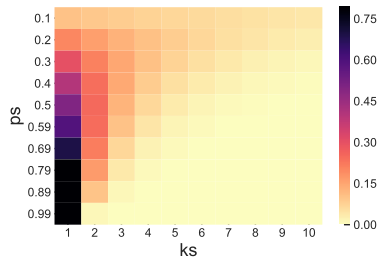

In [8]:
sns.heatmap(pivoted, cmap = 'magma_r', robust = True);

### Negative Binomial distribution

* **Story.** We perform a series of Bernoulli trials until we
get $n$ successes.  The number of failures, $k$, before we get $n$
successes is Negative Binomially distributed.

* **Parameters.** There are two parameters: the probability $p$
of success for each Bernoulli trial, and the desired number of
successes, $n$.

* **Example.** Imagine an uber driver has to make 100 five star rides in a month order to get a bonus check. The number of $k$ non-five star rides before he/she gets the check is negatively binomially distributed. 

* **Probability mass function.**

\begin{align}
f(k;n,p) = \begin{pmatrix}
k+n-1 \\
n-1
\end{pmatrix}
p^n (1-p)^k.
\end{align}

Here, we use a combinatorial notation;

\begin{align}
  \begin{pmatrix}
k+n-1 \\
n-1
\end{pmatrix} = \frac{(k+n-1)!}{(n-1)!\,k!}.
\end{align}

Generally speaking, $n$ need not be an integer, so we may write the PMF as

\begin{align}
f(k;n, p) = \frac{\Gamma(k+n)}{\Gamma(n) k!}\,p^r(1-p)^k.
\end{align}


**Notes.** If $n = 1$, this distribution reduces to the Geometric
distribution.

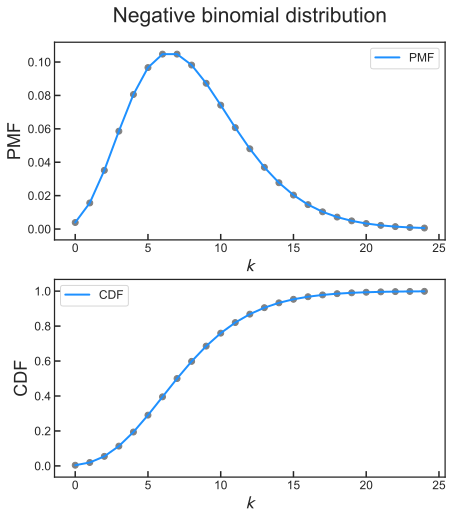

In [34]:
n = 8 
p = 0.5
ks = np.arange(0,25)

ks_plot = []
pmfs = []
cdfs = []

for i in ks:
    
    ks_plot.append(i)
    pmfs.append(st.nbinom.pmf(k = i, p = p, n = n))
    cdfs.append(st.nbinom.cdf(k = i, p = p, n = n))

plt.figure(figsize = (7,8))  
plt.subplot(2,1,1)    
plt.plot(ks_plot, pmfs, color = 'dodgerblue', label = 'PMF')  
plt.scatter(ks_plot, pmfs, color = 'grey')  
plt.title('Negative binomial distribution')
plt.xlabel('$k$')
plt.ylabel('PMF')
plt.legend()

plt.subplot(2,1,2)
plt.plot(ks_plot, cdfs, color = 'dodgerblue', label = 'CDF')  
plt.scatter(ks_plot, cdfs, color = 'grey')  
plt.xlabel('$k$')
plt.ylabel('CDF')
plt.legend();

In [10]:
##Keeping n constant

n = 10 

ps = np.linspace(0.2, 0.99, 20)

ks = np.arange(1, 20)

ps_plot = []

ks_plot = []

nbinom_pmfs = []

for i in ps:
    for j in ks:
        ps_plot.append(np.round(i,2))
        ks_plot.append(j)
        nbinom_pmfs.append(st.nbinom.pmf(p = i, k = j, n = n))

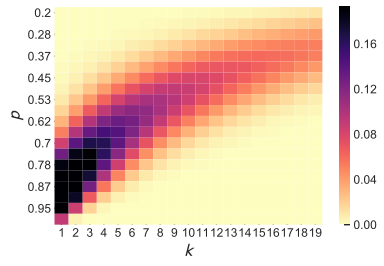

In [11]:
df = pd.DataFrame({'$p$':ps_plot, '$k$':ks_plot , 'PMF': nbinom_pmfs})

pivoted_nbinom = df.pivot('$p$', '$k$', 'PMF')

sns.heatmap(pivoted_nbinom, cmap = 'magma_r', robust = True);

In [12]:
##Keeping k constant

k = 5

ps = np.linspace(0.1, 0.99, 20)

ns = np.arange(0, 20)

ps_plot = []

ns_plot = []

nbinom_pmfs = []

for i in ps:
    for j in ns:
        ps_plot.append(np.round(i,2))
        ns_plot.append(j)
        nbinom_pmfs.append(st.nbinom.pmf(p = i, k = k, n = j));

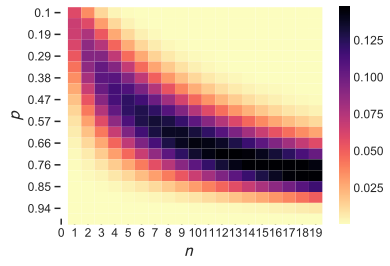

In [13]:
df = pd.DataFrame({'$p$':ps_plot, '$n$':ns_plot , 'PMF': nbinom_pmfs})

pivoted_nbinom = df.pivot('$p$', '$n$', 'PMF')

sns.heatmap(pivoted_nbinom, cmap = 'magma_r', robust = True);

### Binomial distribution

* **Story.** We perform $n$ Bernoulli trials with probability $p$ of success.  The number of successes, $k$, is binomially distributed.

* **Parameters.** There are two parameters: the probability $p$ of success for each Bernoulli trial, and the number of trials, $n$.

* **Example.** Distribution of plasmids between daughter cells
in cell division.  Each of the $n$ plasmids as a chance $p$ of being
in daughter cell 1 ("success").  The number of plasmids, $k$, in
daughter cell 1 is binomially distributed.

* **Probability mass function.**

\begin{align}
f(k;n,p) = \begin{pmatrix}
n \\
k
\end{pmatrix}
p^k (1-p)^{n-k}.
\end{align}

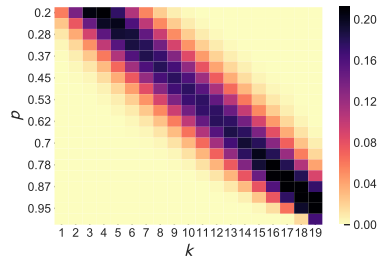

In [15]:
##Keeping n constant

n = 20 

ps = np.linspace(0.2, 0.99, 20)

ks = np.arange(1, 20)

ps_plot = []

ks_plot = []

binom_pmfs = []

for i in ps:
    for j in ks:
        ps_plot.append(np.round(i,2))
        ks_plot.append(j)
        binom_pmfs.append(st.binom.pmf(p = i, k = j, n = n))

df = pd.DataFrame({'$p$':ps_plot, '$k$':ks_plot , 'PMF': binom_pmfs})

pivoted_binom = df.pivot('$p$', '$k$', 'PMF')

sns.heatmap(pivoted_binom, cmap = 'magma_r', robust = True);  

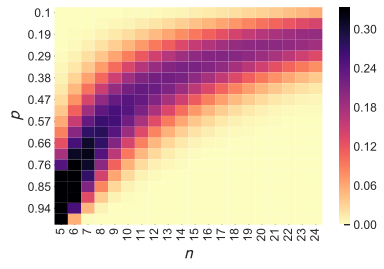

In [16]:
##Keeping k constant

k = 5

ps = np.linspace(0.1, 0.99, 20)

ns = np.arange(5, 25)

ps_plot = []

ns_plot = []

binom_pmfs = []

for i in ps:
    for j in ns:
        ps_plot.append(np.round(i,2))
        ns_plot.append(j)
        binom_pmfs.append(st.binom.pmf(p = i, k = k, n = j))
        
df = pd.DataFrame({'$p$':ps_plot, '$n$':ns_plot , 'PMF': binom_pmfs})

pivoted_binom = df.pivot('$p$', '$n$', 'PMF')

sns.heatmap(pivoted_binom, cmap = 'magma_r', robust = True);

### Poisson distribution

* **Story.**  Rare events occur with a rate $\lambda$ per unit
time.  There is no "memory" of previous events; i.e., that rate is
independent of time. A process that generates such events is called a *Poisson process*. The occurrence of a rare event in this context is referred to as an *arrival*. The number $k$ of arrivals in unit time is Poisson distributed.

* **Parameter.** The single parameter is the rate $\lambda$ of
the rare events occurring.

* **Example.** Neuon firing are Poisson distributed.

* **Probability mass function.**
\begin{align}
f(k;\lambda) = \frac{\lambda^k}{k!}\,\mathrm{e}^{-\lambda}.
\end{align}


In [17]:
ks = np.arange(0,21)
mus = np.arange(1, 20)

ks_plot = []
mus_plot = []
poisson_pmfs = []

for i in ks:
    for j in mus:
        ks_plot.append(i)
        mus_plot.append(j)
        poisson = st.poisson.pmf(k = i, mu = j)
        poisson_pmfs.append(poisson)

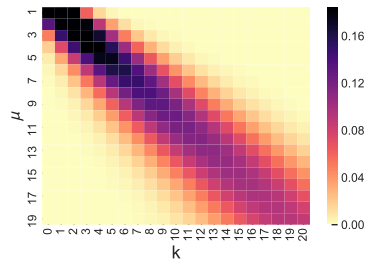

In [18]:
df = pd.DataFrame({'$\mu$':mus_plot, 'k':ks_plot , 'PMF': poisson_pmfs})

pivoted = df.pivot('$\mu$', 'k', 'PMF')

sns.heatmap(pivoted, cmap= 'magma_r', robust = True);

### Hypergeometric distribution

* **Story.** Consider an urn with $w$ white balls and $b$ black
balls.  Draw $n$ balls from this urn without replacement.  The number
white balls drawn, $k$, is Hypergeometrically distributed.

* **Parameters.** There are three parameters: the number of
draws $n$, the number of white balls $w$, and the number of black
balls $b$.

* **Example.** There are $N$ finches on an island, and $n_t$ of
them are tagged.  You capture $n$ finches.  The number of tagged
finches $k$ is Hypergeometrically distributed, $f(k;n_t, N-n_t, n)$,
as defined below.

* **Probability mass function.**

\begin{align}
f(k;w, b, n) = \frac{\begin{pmatrix}w\\k\end{pmatrix}\begin{pmatrix}b\\n-k\end{pmatrix}}
{\begin{pmatrix}w+b\\n\end{pmatrix}}.
\end{align}
Alternatively, if we define $N = w + b$, we could write
\begin{align}
f(k;N, w, n) = \frac{\begin{pmatrix}w\\k\end{pmatrix}\begin{pmatrix}N-w\\n-k\end{pmatrix}}
{\begin{pmatrix}N\\n\end{pmatrix}}.
\end{align}
This is how it is [defined in the `scipy.stats` module](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.hypergeom.html). In general, because distributions have different equivalent representations, it is important to check the documentation to make sure you are using the function correctly.


* **Notes.** This distribution is analogous to the Binomial
distribution, except that the Binomial distribution describes draws
from an urn *with* replacement.  In the analogy, $p = w/(w+b)$.

When using the sliders below, you will only get a plot if $N \le w$ and $N \le n$ because the distribution is only defined for these values.

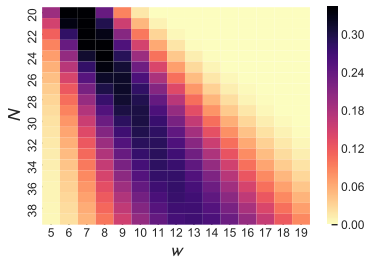

In [19]:
##Keeping n and k constant, varying w and N

k = 5 # white balls drawn
n = 15 # sample size

ws = np.arange(5, 20) #total number of white balls

Ns = np.arange(20, 40) #total num of balls 

ws_plot = []

Ns_plot = []

hypergeom_pmfs = []

for i in ws:
    for j in Ns:
        ws_plot.append(i)
        Ns_plot.append(j)
        hypergeom_pmfs.append(st.hypergeom.pmf(k = k, N = n, n = i, M = j))
        
df = pd.DataFrame({'$N$':Ns_plot, '$w$':ws_plot , 'PMF': hypergeom_pmfs})

pivoted_hypergeom = df.pivot('$N$', '$w$', 'PMF')

sns.heatmap(pivoted_hypergeom, cmap = 'magma_r', robust = True);

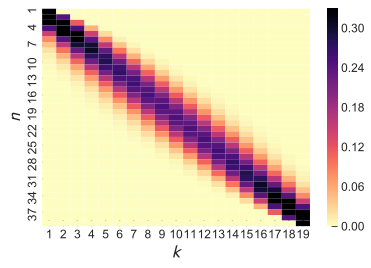

In [20]:
##Keeping M and N constant, varying k and n

M = 40 # total no of objects
N = 20 # sample size

ns = np.arange(1, 40) # total number of white balls
ks = np.arange(1, 20) # drawn white objects

ks_plot = []
ns_plot = []
hypergeom_pmfs = []

for i in ns:
    for j in ks:
        ns_plot.append(i)
        ks_plot.append(j)
        hypergeom_pmfs.append(st.hypergeom.pmf(k = j, N = N, n = i, M = M))
        
df = pd.DataFrame({'$k$':ks_plot, '$n$':ns_plot , 'PMF': hypergeom_pmfs})

pivoted_hypergeom = df.pivot('$n$', '$k$', 'PMF')

sns.heatmap(pivoted_hypergeom, cmap = 'magma_r', robust = True);

## Continuous probability distributions 

### Gaussian, a.k.a. Normal, distribution

* **Story.** Any quantity that emerges as the sum of a large number of
subprocesses tends to be Gaussian distributed provided none of the
subprocesses is very broadly distributed.

* **Parameters.** The Gaussian distribution has two parameters,
the mean $\mu$, which determines the location of its peak, and the
standard deviation $\sigma$, which is strictly positive (the
$\sigma\to 0$ limit defines a Dirac delta function) and determines the
width of the peak.

* **Example.** We measure the height of the people in the room. The heights are normally distributed.

* **Probability density function.**

\begin{align}
f(x;\mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}}\,\mathrm{e}^{-(x-\mu)^2/2\sigma^2}.
\end{align}

* **Notes.** This is a limiting distribution in the sense of the
central limit theorem, but also in that many distributions have a
Gaussian distribution as a limit.  This is seen by formally taking
limits of, e.g., the Gamma, Student-t, Binomial distributions, which
allows direct comparison of parameters.

In [21]:
mu = 5
std_dev = 1.5 

x = np.linspace(0, 10, 30)
pdf = st.norm.pdf(x, loc=mu, scale= std_dev)
cdf = st.norm.cdf(x, loc=mu, scale= std_dev)

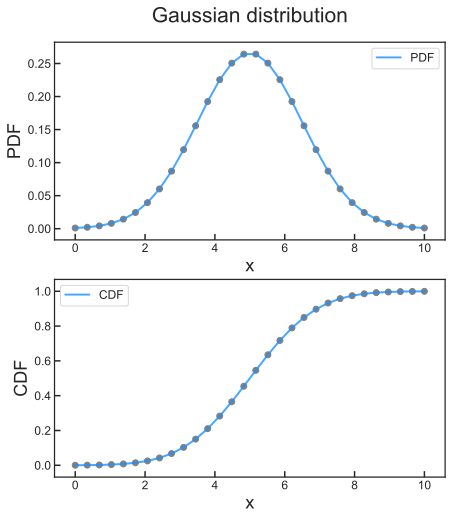

In [22]:
plt.figure(figsize = (7,8))
plt.subplot(2,1,1)    
plt.plot(x, pdf, color = 'dodgerblue', alpha = 0.8, label = 'PDF')
plt.scatter(x, pdf, color = 'grey')
plt.title('Gaussian distribution')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()

plt.subplot(2,1,2) 
plt.plot(x, cdf, color = 'dodgerblue', alpha = 0.8, label = 'CDF')
plt.scatter(x, cdf, color = 'grey')
plt.xlabel('x')
plt.ylabel('CDF')
plt.legend();


In [23]:
mus = np.arange(1, 11)
std_dev = 1.2

x = np.round(np.linspace(0, 10, 50),2)
    
df_plot = pd.DataFrame()

for mu in mus: 
    
    pdf = st.norm.pdf(x, loc=mu, scale= std_dev)
    mu_list = [mu]*len(x)
    
    df = pd.DataFrame({'x':x, '$\mu$':mu_list, 'pdf':pdf})
    
    df_plot = pd.concat([df_plot, df])

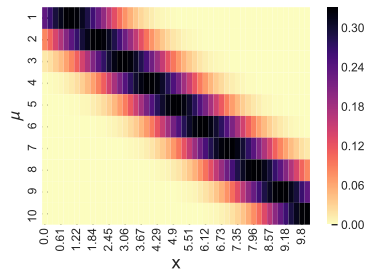

In [24]:
pivot_df = df_plot.pivot('$\mu$', 'x', 'pdf')
sns.heatmap(pivot_df, cmap = 'magma_r', robust = True);

### Exponential distribution

* **Story.** This is the waiting time for an arrival from a
Poisson process.  I.e., the inter-arrival time of a Poisson process is
Exponentially distributed. For example, the interspike arrival time is exponentially distributed. 

* **Parameter.** The single parameter is the average arrival
*rate*, $r$. Alternatively, we can use $\tau=1/r$ as the parameter, in this case a characteristic arrival *time*.

**Example.** The time between conformational switches in a
protein is Exponentially distributed (under simple mass action
kinetics).

**Probability density function.**
\begin{align}
f(x;r) = r \mathrm{e}^{-rx}.
\end{align}

Alternatively, we could parametrize it as

\begin{align}
f(x;\tau) = \frac{1}{\tau}\, \mathrm{e}^{-x/\tau}.
\end{align}


**Notes.** The Exponential distribution is the continuous
analog of the Geometric distribution.  The "rate" in the Exponential
distribution is analogous to the probability of success of the
Bernoulli trial. Note also that because they are uncorrelated, the
amount of time between any two arrivals is independent of all other
inter-arrival times.

The implementation in the `scipy.stats` module also has a location parameter, which shifts the distribution left and right. For our purposes, you can ignore that parameter, but be aware that `scipy.stats` requires it.

In the `scipy.stats` implementation scale = $\tau$

In [25]:
tau = 3

x = np.linspace(0, 10, 30)
pdf = st.expon.pdf(x, scale = tau)
cdf = st.expon.cdf(x, scale= tau)

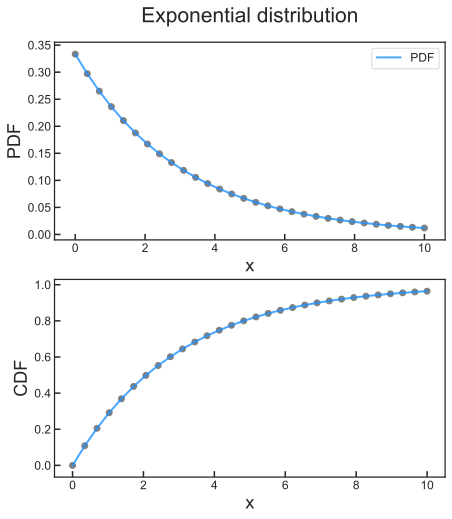

In [26]:
plt.figure(figsize = (7,8))
plt.subplot(2,1,1)    
plt.plot(x, pdf, color = 'dodgerblue', alpha = 0.8, label = 'PDF')
plt.scatter(x, pdf, color = 'grey')
plt.title('Exponential distribution')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()

plt.subplot(2,1,2)    
plt.scatter(x, cdf, color = 'grey')
plt.plot(x, cdf, color = 'dodgerblue', alpha = 0.8, label = 'PDF')
plt.xlabel('x')
plt.ylabel('CDF');

In [27]:
taus = np.arange(2, 5, 0.5)

x = np.round(np.linspace(0, 5, 50), 2)
    
df_plot = pd.DataFrame()

tau_list = []

for tau in taus: 
    
    pdf = st.expon.pdf(x, scale= tau)
    tau_list = [tau]*len(x)
    
    df = pd.DataFrame({'x':x, 'tau': tau_list, 'pdf':pdf})
    
    df_plot = pd.concat([df_plot, df])

In [29]:
df_pivot = df_plot.pivot('tau', 'x', 'pdf')

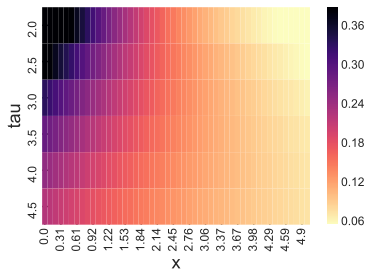

In [30]:
sns.heatmap(df_pivot, cmap= 'magma_r', robust = True);